<a href="https://colab.research.google.com/github/IgnacioPardo/SNN/blob/main/SNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Neural Network

Simple Red Neuronal (Perceptrón) para la materia Tecnologías Exponenciales - TIC

Inspirado en https://github.com/jonasbostoen/simple-neural-network

### Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import tabulate
import networkx as nx
from random import random as rand
import itertools

In [2]:
np.random.seed(1)

### Funciones

In [3]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) )

# sigmoid = lambda x : 1 / ( 1 + np.exp(-x) )

def sigmoid_derivative(x):
    return x * (1 - x)

# sigmoid_derivative = lambda x : x * (1 - x)


Sigmoid Function
$$\operatorname{f}(x)=\frac{1}{1+e^{(-x)}}$$

Sigmoid Derivative Function
$$\operatorname{f'}(x)=x \times (1-x)$$

#### Visualización Función Sigmoide

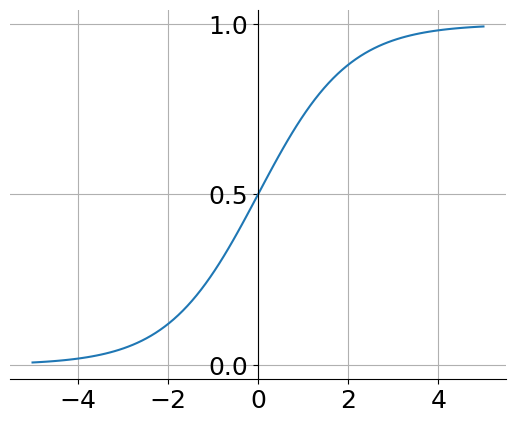

In [4]:
x = np.linspace(-5,5,100)
y = sigmoid(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.plot(x, y)
plt.locator_params(axis='y', nbins=3)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.grid()

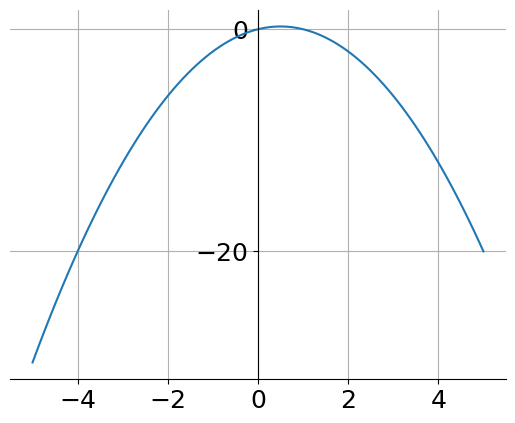

In [5]:
x = np.linspace(-5, 5, 100)
y = sigmoid_derivative(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines["left"].set_position("center")

# Eliminate upper and right axes
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

plt.plot(x, y)
plt.locator_params(axis="y", nbins=3)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.grid()

## Setup

### Values

#### Training Values

In [6]:
training_inputs = np.array([
    [0,0,1],
    [1,1,1],
    [1,0,1],
    [0,1,1]
])

training_outputs = np.array([[0,1,1,0]]).T

display(training_inputs)
display(training_outputs)

array([[0, 0, 1],
       [1, 1, 1],
       [1, 0, 1],
       [0, 1, 1]])

array([[0],
       [1],
       [1],
       [0]])

In [7]:
training_values = np.concatenate((training_inputs.T, training_outputs.T)).T
table = lambda arr : display(HTML(tabulate.tabulate(arr, tablefmt='html')))
table(training_values)

0,0,1,0
1,1,1,1
1,0,1,1
0,1,1,0


#### Synaptic weights 

In [11]:
training_inputs.shape[1]

3

In [14]:
training_outputs.shape[1]

1

In [15]:
synaptic_weights = np.random.random((3, 1))

synaptic_weights

array([[0.30233257],
       [0.14675589],
       [0.09233859]])

## Training

Para obtener un resultado a partir de los inputs y los synaptic weights se realiza la siguiente función:

$$\sum_{i=0}^{n}{x_iw_i}$$

Y se le aplica la función sigmoide para normalizar al rango 0, 1

Por ejemplo, si nuestros inputs $x_i$ son `[1, 1, 1]` y nuestros pesos sinapticos $w_i$ son `[[11.30926442], [-0.20511667], [-5.4500033]]`

Nos resulta la cuenta
$$[1 \times 11.30926442] + [1 \times (-0.20511667)] + [1 \times (-5.4500033)] = 5.6541444499999995$$

Con la función sigmoide es facil ver como $$\operatorname{sigmoid}(5.65) \approx 1$$

In [17]:
forward = lambda x, w: sigmoid(np.dot(x, w))

In [18]:
input_layer = training_inputs

# Genera un output haciendo la suma de los valores de input multiplicados por su peso sinaptico, y aplicandole la función sigmoide para normalizar a -1, 1
outputs = forward(input_layer, synaptic_weights)

outputs

array([[0.52306826],
       [0.63214433],
       [0.59740668],
       [0.55949049]])

In [19]:
training_outputs

array([[0],
       [1],
       [1],
       [0]])

In [20]:
# Calculo el error
error = training_outputs - outputs
error

array([[-0.52306826],
       [ 0.36785567],
       [ 0.40259332],
       [-0.55949049]])

In [21]:
sigmoid_derivative(outputs)

array([[0.24946786],
       [0.23253788],
       [0.24051194],
       [0.24646088]])

In [22]:
adjustments = error * sigmoid_derivative(outputs)
adjustments

array([[-0.13048872],
       [ 0.08554038],
       [ 0.0968285 ],
       [-0.13789252]])

In [23]:
np.dot(input_layer.T, adjustments)

array([[ 0.18236888],
       [-0.05235214],
       [-0.08601236]])

In [28]:
epochs = 50000

for iteration in range(epochs):

    # Arranca con los valores de training
    input_layer = training_inputs

    # Genera un output haciendo la suma de los valores de input multiplicados por su peso sinaptico, y aplicandole la función sigmoide para normalizar a -1, 1
    outputs = forward(input_layer, synaptic_weights)

    # Calculo el error
    error = training_outputs - outputs

    # Ajusto los pesos en funcion al error y al resultado obtenido
    adjustments = error * sigmoid_derivative(outputs)
    synaptic_weights += np.dot(input_layer.T, adjustments)

In [29]:
print('Synaptic weights after training')
print(synaptic_weights)

print('Outputs after training: ')
print(outputs)

Synaptic weights after training
[[11.32946152]
 [-0.20517468]
 [-5.46007203]]
Outputs after training: 
[[0.00423528]
 [0.99654408]
 [0.99718333]
 [0.00345237]]


## Eval

In [30]:
table(training_values)

0,0,1,0
1,1,1,1
1,0,1,1
0,1,1,0


In [31]:
large = lambda x : display(HTML('<p style="font-size: 50px; color: #66D148">'+str(x)+'</p>'))

In [32]:
a = 1 #@param {type:"integer"}
c = 1 #@param {type:"integer"}
b = 1 #@param {type:"integer"}

input_layer = np.array([a, b, c])
res = sigmoid(np.dot(input_layer, synaptic_weights))[0]
display(res)

thresh = 0.01
out = 0 if res < thresh else 1

large(out)

0.996544114887996

### Graph

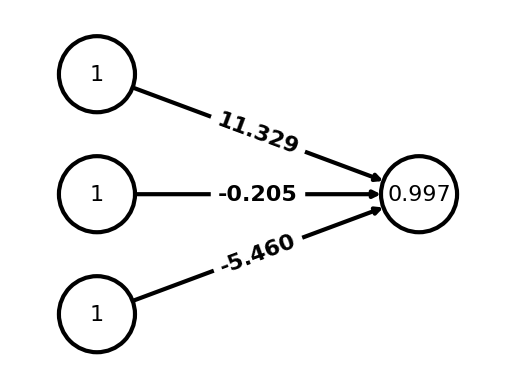

In [33]:
G = nx.DiGraph()
layers = [[0, 1, 2], [3]]

rels = list(itertools.product(*layers))
#rels.append((3, 4))
flatten = lambda l: [x for i in l for x in i]

labels = {i: v for i, v in enumerate(input_layer)}
labels[3] = round(res, 3)
#labels[4] = 0 if res < thresh else 1

pos = {}
m = max([len(l) for l in layers])
for i, l in enumerate(layers):
  for j, v in enumerate(l):
    pos[v] = (i, len(l) - j)

pos[3] = (pos[3][0], pos[1][1])
#pos[4] = (pos[3][0] + 1, pos[1][1])

weights_labels = {(ra, rb): "{:0.3f}".format(synaptic_weights[i][0]) for i, (ra, rb) in enumerate(rels)}
G.add_edges_from(rels)

options = {
    "font_size": 16,
    "node_size": 3000,
    "node_color": [(1, 1, 1, 1) for _ in range(len(labels))],
    "edgecolors": "black",
    "linewidths": 3,
    "width": 3,
    "labels": labels,
    "connectionstyle": "arc3, rad=0",
}

nx.draw_networkx(G, pos, **options)

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=weights_labels,
    font_color='black',
    font_size=16, 
    font_weight='bold'
)

plt.axis('off')
ax = plt.gca()
ax.margins(0.20)
plt.show()